# Data Exploratory

install dependancies

In [1]:
!pip install pandas numpy

In [2]:
!pip install matplotlib seaborn scikit-learn xgboost

In [3]:
#import dependancies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings("ignore")

In [4]:
#Load data

df = pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#find the missing/null value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

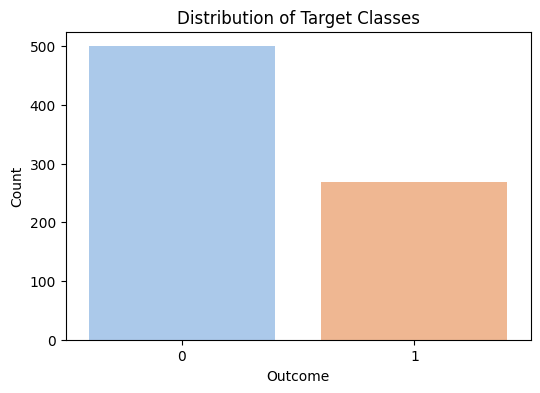

Outcome
0    500
1    268
Name: count, dtype: int64


In [12]:
#Data Visualization
#Get the value count
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, palette='pastel')
plt.title('Distribution of Target Classes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()
print(df['Outcome'].value_counts())

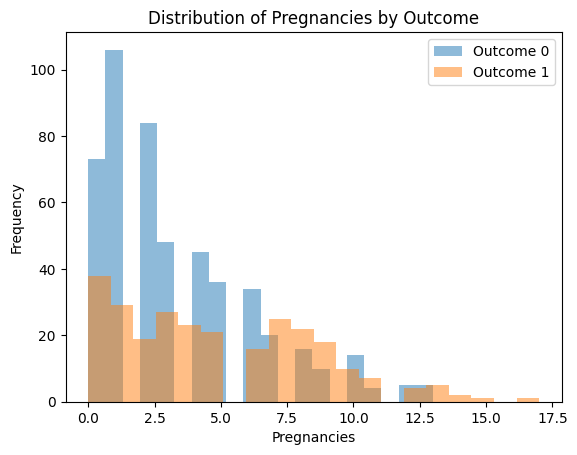

In [13]:
plt.hist(df[df['Outcome'] == 0]['Pregnancies'], alpha=0.5, label='Outcome 0', bins=20)
plt.hist(df[df['Outcome'] == 1]['Pregnancies'], alpha=0.5, label='Outcome 1', bins=20)
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.title('Distribution of Pregnancies by Outcome')
plt.legend()

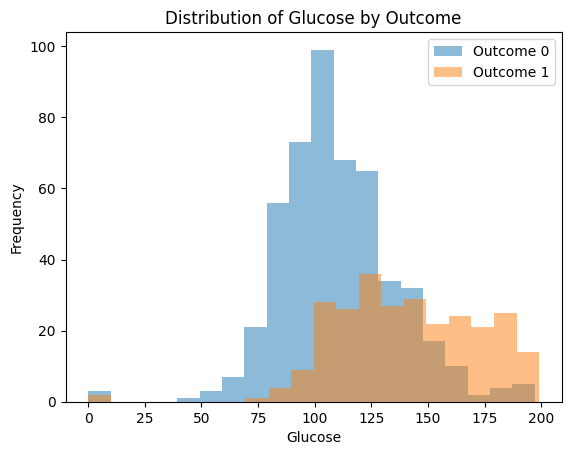

In [14]:
plt.hist(df[df['Outcome'] == 0]['Glucose'], alpha=0.5, label='Outcome 0', bins=20)
plt.hist(df[df['Outcome'] == 1]['Glucose'], alpha=0.5, label='Outcome 1', bins=20)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose by Outcome')
plt.legend()

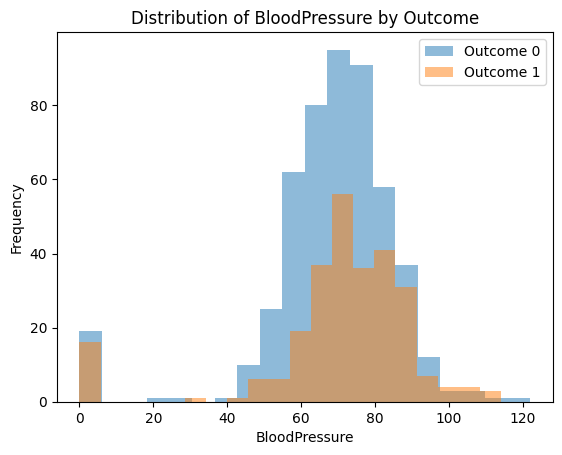

In [15]:
plt.hist(df[df['Outcome'] == 0]['BloodPressure'], alpha=0.5, label='Outcome 0', bins=20)
plt.hist(df[df['Outcome'] == 1]['BloodPressure'], alpha=0.5, label='Outcome 1', bins=20)
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.title('Distribution of BloodPressure by Outcome')
plt.legend()

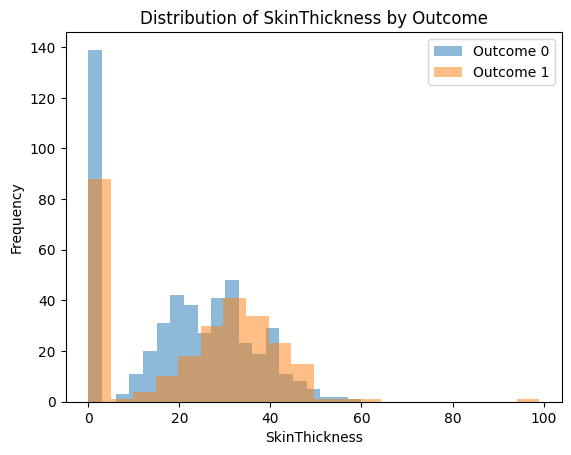

In [16]:
plt.hist(df[df['Outcome'] == 0]['SkinThickness'], alpha=0.5, label='Outcome 0', bins=20)
plt.hist(df[df['Outcome'] == 1]['SkinThickness'], alpha=0.5, label='Outcome 1', bins=20)
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.title('Distribution of SkinThickness by Outcome')
plt.legend()

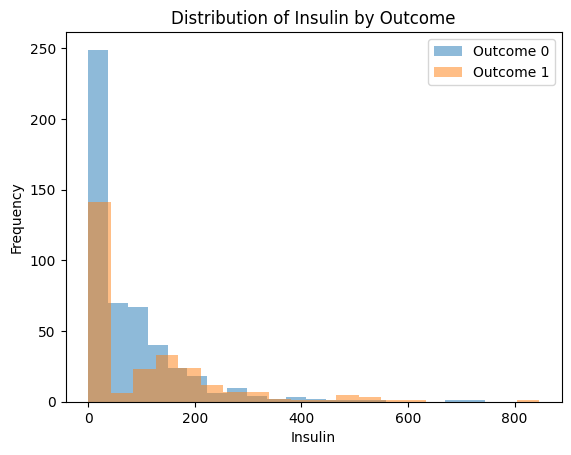

In [17]:
plt.hist(df[df['Outcome'] == 0]['Insulin'], alpha=0.5, label='Outcome 0', bins=20)
plt.hist(df[df['Outcome'] == 1]['Insulin'], alpha=0.5, label='Outcome 1', bins=20)
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.title('Distribution of Insulin by Outcome')
plt.legend()

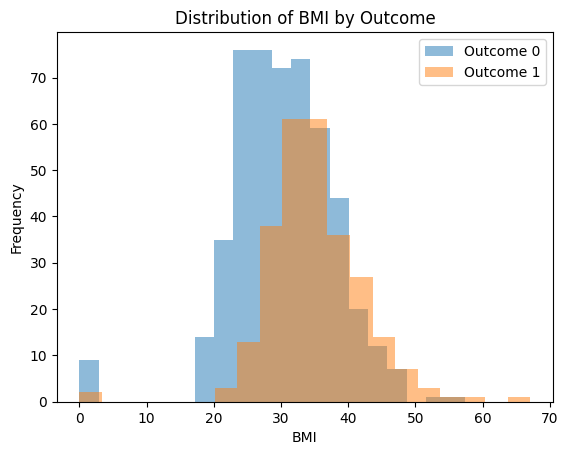

In [18]:
plt.hist(df[df['Outcome'] == 0]['BMI'], alpha=0.5, label='Outcome 0', bins=20)
plt.hist(df[df['Outcome'] == 1]['BMI'], alpha=0.5, label='Outcome 1', bins=20)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI by Outcome')
plt.legend()

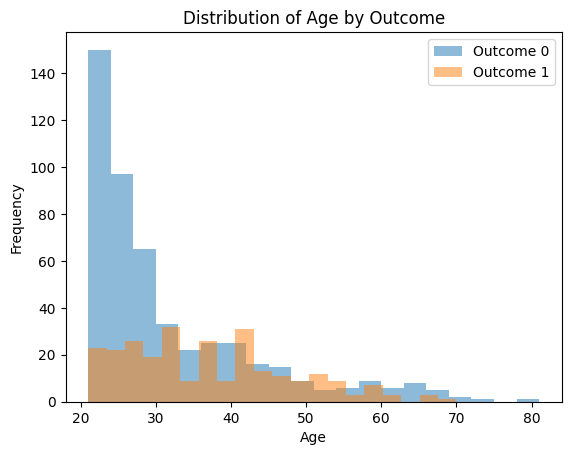

In [19]:
plt.hist(df[df['Outcome'] == 0]['Age'], alpha=0.5, label='Outcome 0', bins=20)
plt.hist(df[df['Outcome'] == 1]['Age'], alpha=0.5, label='Outcome 1', bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Outcome')
plt.legend()

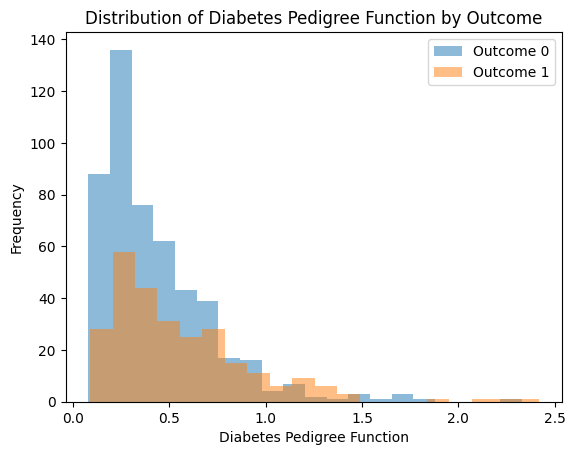

In [20]:
plt.hist(df[df['Outcome'] == 0]['DiabetesPedigreeFunction'], alpha=0.5, label='Outcome 0', bins=20)
plt.hist(df[df['Outcome'] == 1]['DiabetesPedigreeFunction'], alpha=0.5, label='Outcome 1', bins=20)
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes Pedigree Function by Outcome')
plt.legend()

## Checking data correlation

In [21]:
corr = df.corr()

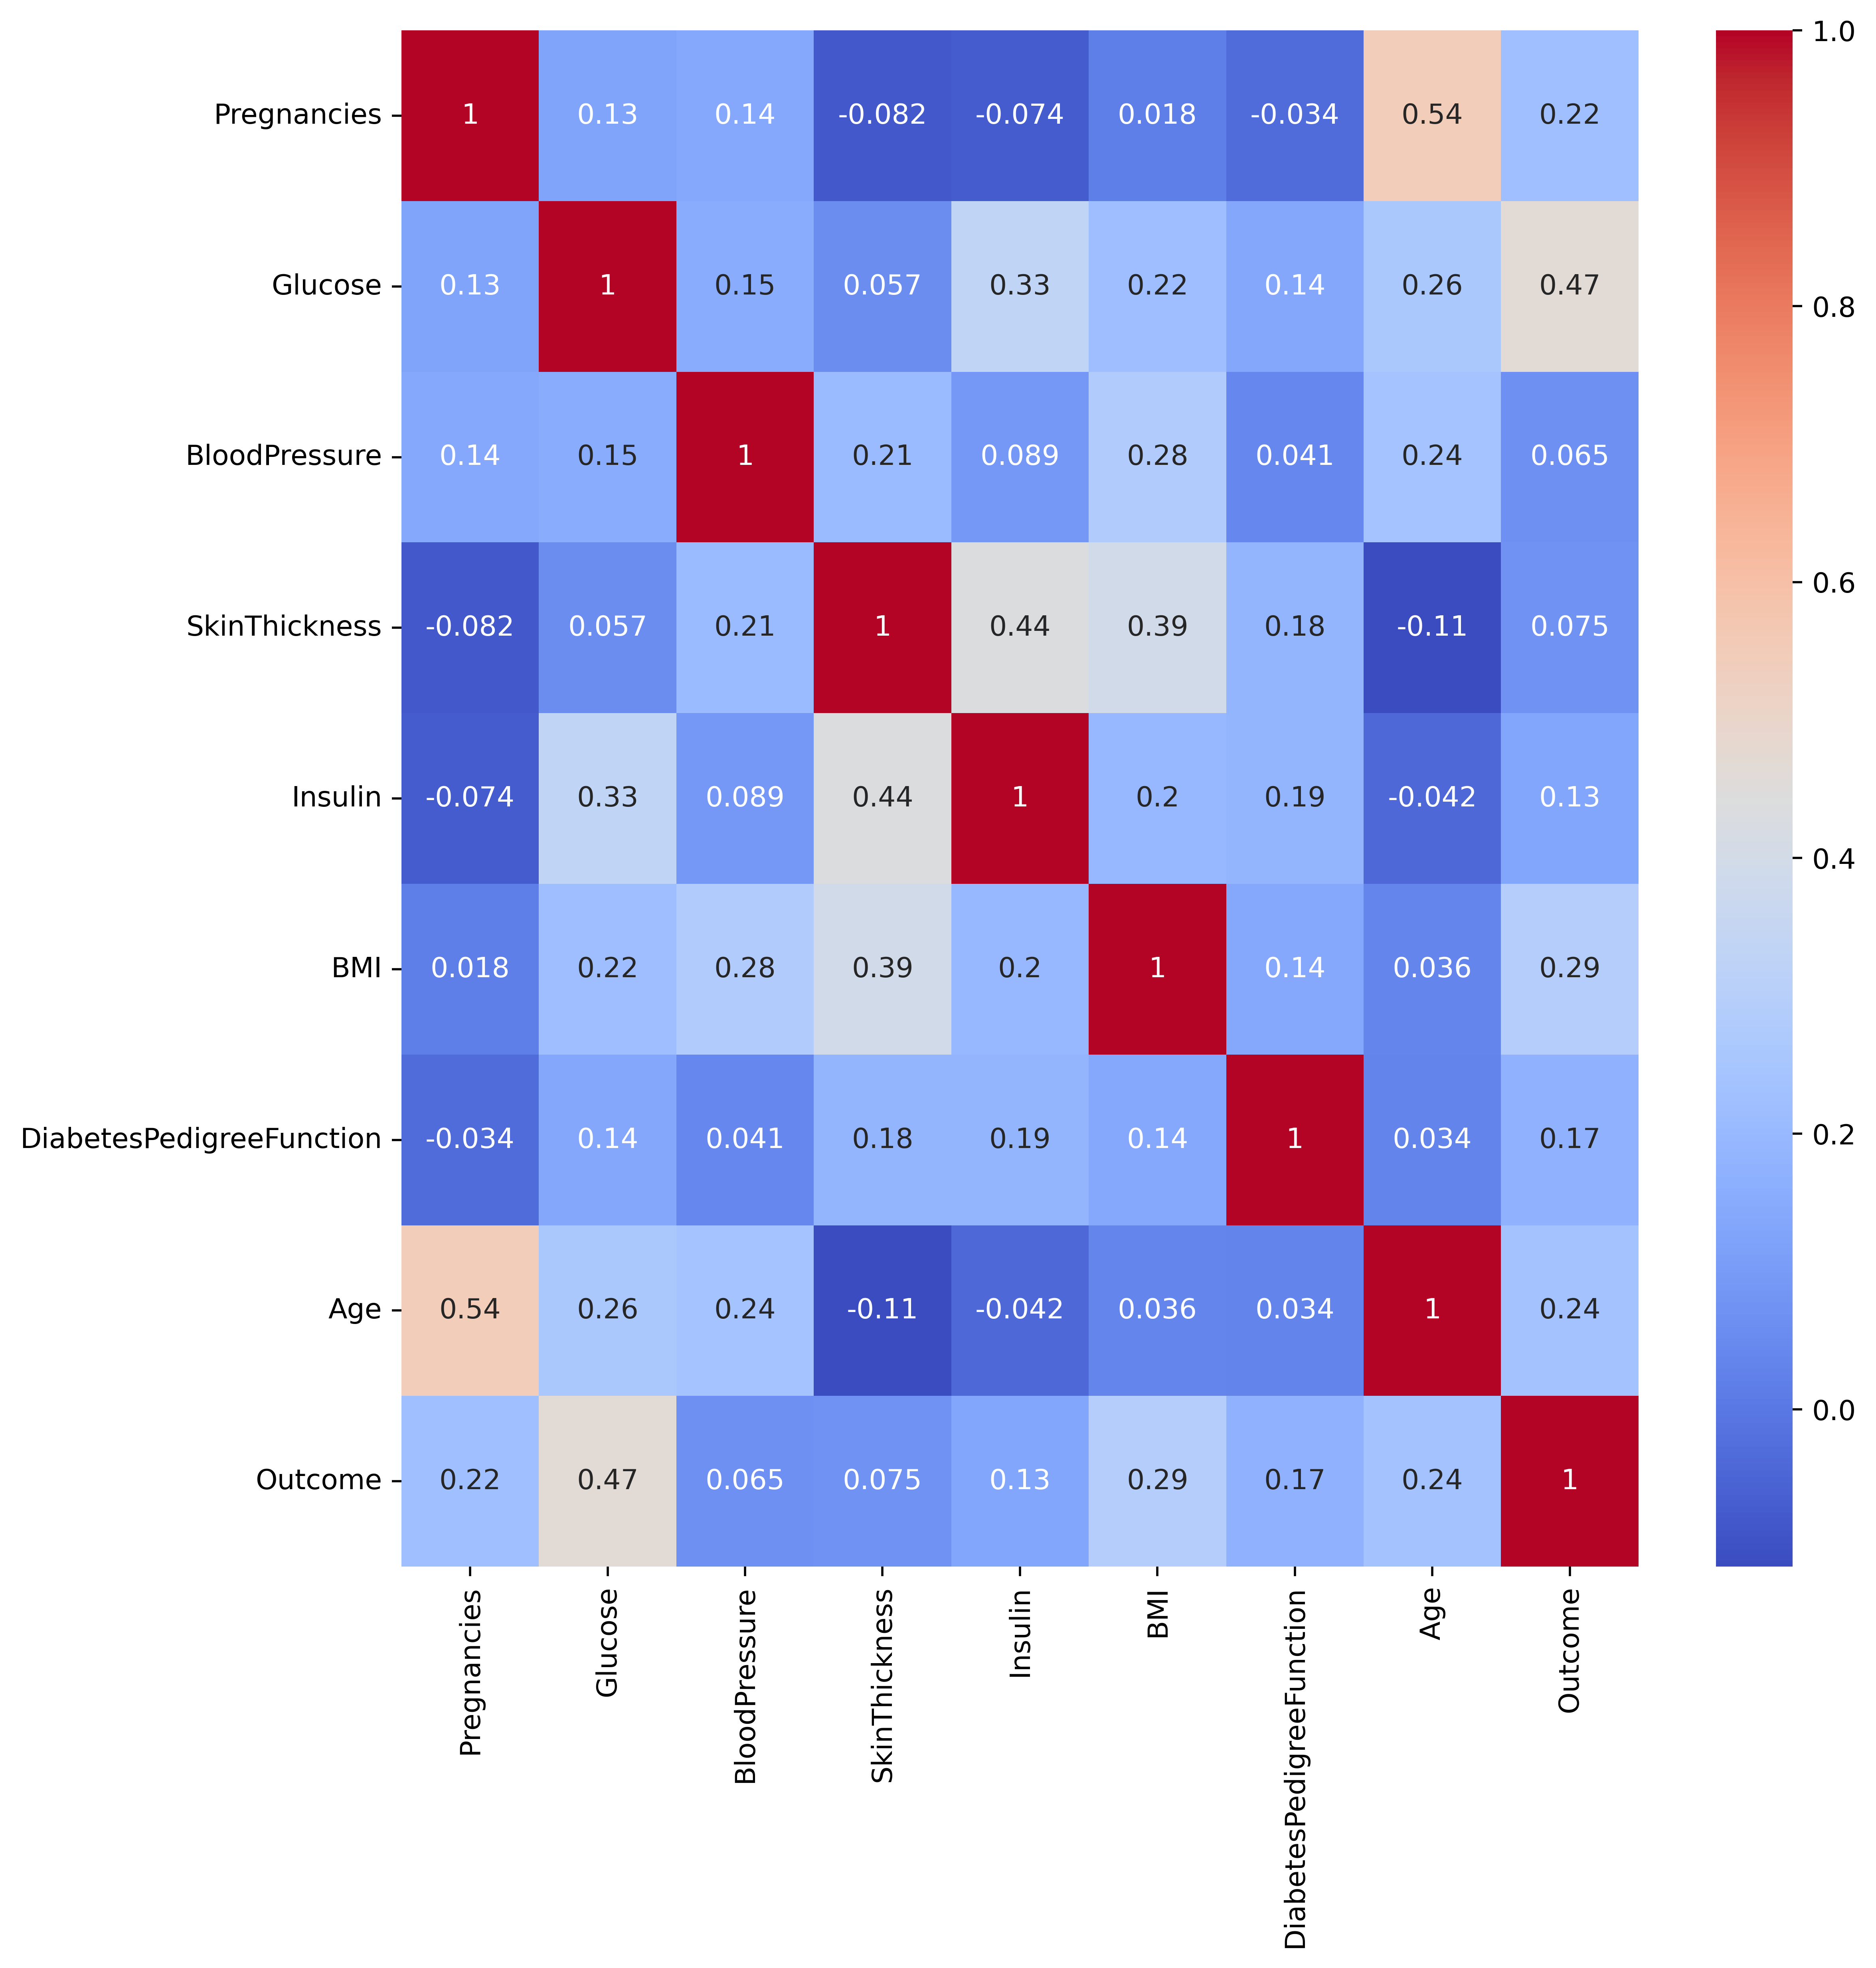

In [48]:
import seaborn as sns
corr 

#Visualize correlation
plt.figure(figsize=(10,10), dpi=500)
sns.heatmap(corr, annot=True, cmap='coolwarm') #fmt=".2f", linewidths=.5)
plt.show()

# Train Model

In [23]:
!pip install imbalanced-learn

In [24]:
x = df.drop(columns = 'Outcome', axis = 1)
y = df['Outcome']

In [25]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
x = scale.fit_transform(x)


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.2,
                                                   shuffle=True,
                                                   random_state=42,
                                                   stratify=y)

print('x_train shape is ' , x_train.shape)
print('x_test shape is ' , x_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

x_train shape is  (614, 8)
x_test shape is  (154, 8)
y_train shape is  (614,)
y_test shape is  (154,)


In [27]:
from imblearn.combine import SMOTEENN

smoten = SMOTEENN(random_state=42)
x_resampled, y_resampled = smoten.fit_resample(x, y)

print('x_resampled shape is', x_resampled.shape)
print('y_resampled shape is', y_resampled.shape)

x_resampled shape is (581, 8)
y_resampled shape is (581,)


In [28]:
x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled = train_test_split(x_resampled, y_resampled,
                                                                                           test_size=0.2,
                                                                                           random_state=42,
                                                                                           shuffle=True,
                                                                                           stratify=y_resampled)
print('x_train_resampled shape is ' , x_train_resampled.shape)
print('x_test_resampled shape is ' , x_test_resampled.shape)
print('y_train_resampled shape is ' , y_train_resampled.shape)
print('y_test_resampled shape is ' , y_test_resampled.shape)

x_train_resampled shape is  (464, 8)
x_test_resampled shape is  (117, 8)
y_train_resampled shape is  (464,)
y_test_resampled shape is  (117,)


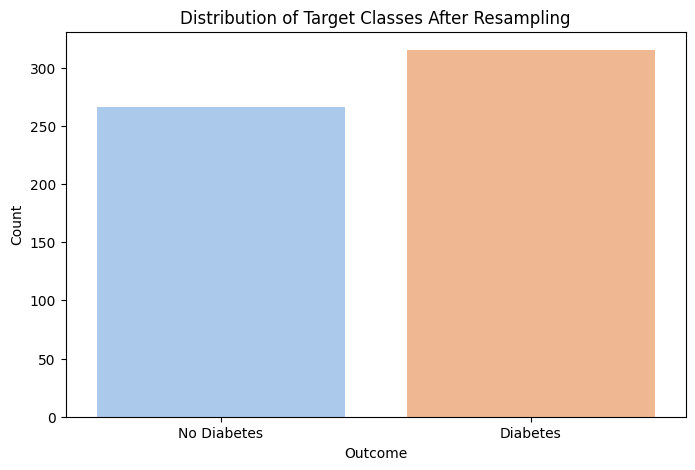

Value counts after resampling:
Outcome
1    315
0    266
Name: count, dtype: int64


In [29]:
# Convert resampled data back to a DataFrame
resampled_data = pd.DataFrame(x_resampled, columns=[f'Feature_{i}' for i in range(x_resampled.shape[1])])
resampled_data['Outcome'] = y_resampled

# Visualize the distribution of the target classes after resampling
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=resampled_data, palette='pastel')
plt.title('Distribution of Target Classes After Resampling')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()
value_counts = resampled_data['Outcome'].value_counts()
print("Value counts after resampling:")
print(value_counts)

## KNN

In [30]:
KNN = KNeighborsClassifier()
cv_scores = cross_val_score(KNN, x_train, y_train, cv=5, scoring='accuracy',verbose=0)
#cv_scores
cv_results = {}
cv_results[KNN] = cv_scores.mean()
print(f"Mean accuracy for KNN: {cv_scores.mean():}")

Mean accuracy for KNN: 0.7394508863121417


In [31]:
#Hypertuning

knn = KNeighborsClassifier()
param = {'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']}

knn_grid = GridSearchCV(knn,
                        param,
                        cv=5,
                        scoring='accuracy',
                        verbose=0)
knn_grid.fit(x_train, y_train)
best_params = knn_grid.best_params_
best_score = knn_grid.best_score_
print(f"\nBest parameters for {knn}: {best_params}")
print(f"Best cross-validation score for {knn}: {best_score}")


Best parameters for KNeighborsClassifier(): {'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation score for KNeighborsClassifier(): 0.7492602958816473


<Axes: >

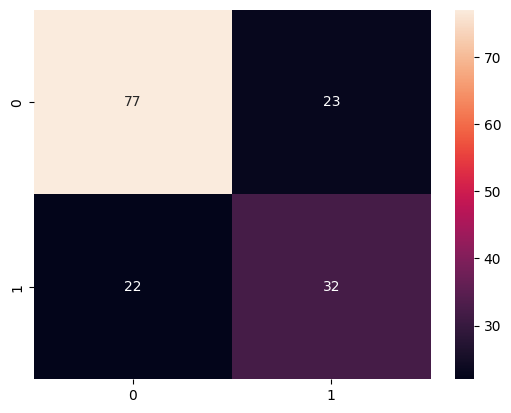

In [32]:
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
cfm = confusion_matrix(y_test, pred)


sns.heatmap(cfm, annot=True)

In [33]:
KNN = KNeighborsClassifier()
KNN.fit(x_train_resampled,y_train_resampled)
cv_scores = cross_val_score(KNN, x_train_resampled, y_train_resampled, cv=5, scoring='accuracy', n_jobs=-1,verbose=0)
#cv_scores
cv_results[KNN] = cv_scores.mean()
print(f"Mean accuracy for KNN: {cv_scores.mean():}")

Mean accuracy for KNN: 0.9460028050490884


In [34]:
y_train_pred = KNN.predict(x_train_resampled)
knn_pred = KNN.predict(x_test_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)  
train_recall = recall_score(y_train_resampled, y_train_pred)  
train_f1 = f1_score(y_train_resampled, y_train_pred)  
test_accuracy = accuracy_score(y_test_resampled, knn_pred)
test_precision = precision_score(y_test_resampled, knn_pred) 
test_recall = recall_score(y_test_resampled, knn_pred)  
test_f1 = f1_score(y_test_resampled, knn_pred) 

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-Score: {train_f1:.2f}')
print('---')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1-Score: {test_f1:.2f}')

Training Accuracy: 0.98
Training Precision: 0.97
Training Recall: 1.00
Training F1-Score: 0.98
---
Test Accuracy: 0.97
Test Precision: 0.95
Test Recall: 1.00
Test F1-Score: 0.98


[[51  3]
 [ 0 63]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.95      1.00      0.98        63

    accuracy                           0.97       117
   macro avg       0.98      0.97      0.97       117
weighted avg       0.98      0.97      0.97       117



<function matplotlib.pyplot.show(close=None, block=None)>

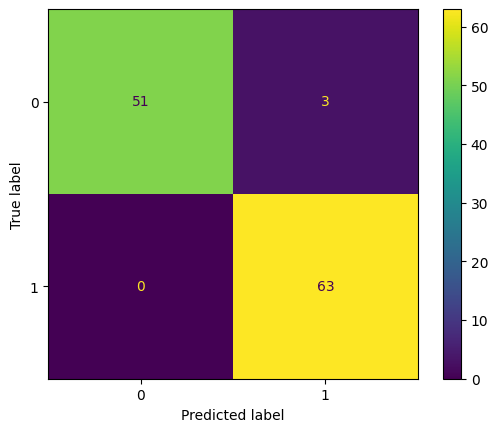

In [35]:
cm = confusion_matrix(y_test_resampled, knn_pred)
print(cm)

#classification report
cr = classification_report(y_test_resampled, knn_pred)
print(cr)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show

## SVC

In [36]:
from sklearn.svm import SVC

svm_clf = SVC()
cv_scores = cross_val_score(svm_clf, x_train, y_train, cv=5, scoring='accuracy',verbose=0)
#cv_scores
cv_results[svm_clf] = cv_scores.mean()
print(f"Mean accuracy for svm_clf: {cv_scores.mean():}")

Mean accuracy for svm_clf: 0.7687858190057311


In [37]:
#Hypertuning

svm_clf = SVC()
param = {'C': [0.01, 0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
SVC_grid = GridSearchCV(SVC(kernel = 'rbf'),
                       param,
                       refit = True,
                       cv = 5,
                       verbose=0)
SVC_grid.fit(x_train, y_train)
print(f"\nBest parameters for {svm_clf}: {best_params}")
print(f"Best cross-validation score for {svm_clf}: {best_score}")


Best parameters for SVC(): {'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation score for SVC(): 0.7492602958816473


<Axes: >

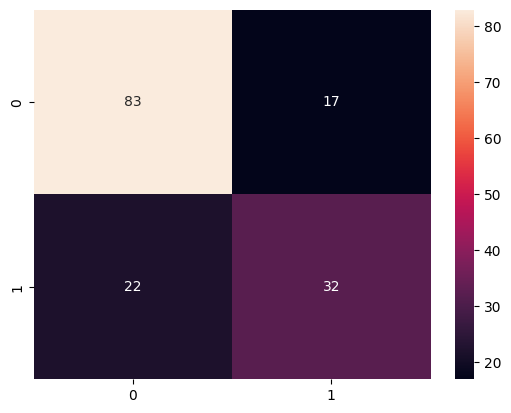

In [38]:
svm_clf.fit(x_train, y_train)
pred = svm_clf.predict(x_test)
cfm = confusion_matrix(y_test, pred)


sns.heatmap(cfm, annot=True)

In [39]:
cv_scores = cross_val_score(svm_clf, x_train_resampled, y_train_resampled, cv=5, scoring='accuracy', n_jobs=-1,verbose=0)
#cv_scores
cv_results[svm_clf] = cv_scores.mean()
print(f"Mean accuracy for KNN: {cv_scores.mean():}")

Mean accuracy for KNN: 0.9331463300607761


In [40]:
y_train_pred = svm_clf.predict(x_train_resampled)
SVC_pred = svm_clf.predict(x_test_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)  
train_recall = recall_score(y_train_resampled, y_train_pred)  
train_f1 = f1_score(y_train_resampled, y_train_pred)  
test_accuracy = accuracy_score(y_test_resampled, SVC_pred)
test_precision = precision_score(y_test_resampled, SVC_pred) 
test_recall = recall_score(y_test_resampled, SVC_pred)  
test_f1 = f1_score(y_test_resampled, SVC_pred) 

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-Score: {train_f1:.2f}')
print('---')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1-Score: {test_f1:.2f}')

Training Accuracy: 0.84
Training Precision: 0.99
Training Recall: 0.71
Training F1-Score: 0.83
---
Test Accuracy: 0.85
Test Precision: 1.00
Test Recall: 0.71
Test F1-Score: 0.83


[[54  0]
 [18 45]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        54
           1       1.00      0.71      0.83        63

    accuracy                           0.85       117
   macro avg       0.88      0.86      0.85       117
weighted avg       0.88      0.85      0.84       117



<function matplotlib.pyplot.show(close=None, block=None)>

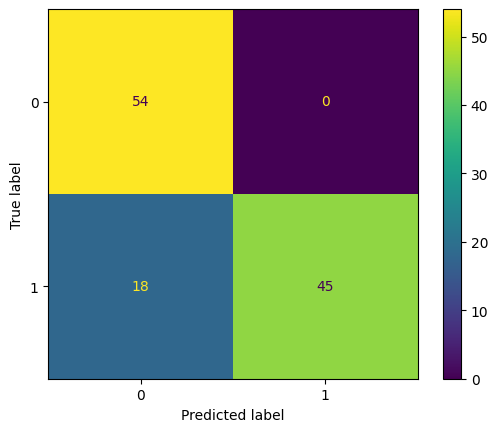

In [41]:
cm = confusion_matrix(y_test_resampled, SVC_pred)
print(cm)

#classification report
cr = classification_report(y_test_resampled, SVC_pred)
print(cr)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show

## Random Forest

In [42]:
rf = RandomForestClassifier()
rf.fit
cv_scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy',verbose=0)
#cv_scores
cv_results[rf] = cv_scores.mean()
print(f"Mean accuracy for rf: {cv_scores.mean():}")

Mean accuracy for rf: 0.7622284419565508


In [43]:
param = {'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20, 30, 40],
         'min_samples_split': [2, 5, 10]}

rf_grid = GridSearchCV(rf,
                param,
                refit = True,
                cv = 5,
                verbose=0)
rf.fit(x_train, y_train)
print(f"\nBest parameters for {rf}: {best_params}")
print(f"Best cross-validation score for {rf}: {best_score}")


Best parameters for RandomForestClassifier(): {'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation score for RandomForestClassifier(): 0.7492602958816473


In [44]:
cv_scores = cross_val_score(rf, x_train_resampled, y_train_resampled, cv=5, scoring='accuracy', n_jobs=-1,verbose=0)
#cv_scores
cv_results[rf] = cv_scores.mean()
print(f"Mean accuracy for rf: {cv_scores.mean():}")

Mean accuracy for rf: 0.948223468910706


In [45]:
y_train_pred = rf.predict(x_train_resampled)
rf_pred = rf.predict(x_test_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)  
train_recall = recall_score(y_train_resampled, y_train_pred)  
train_f1 = f1_score(y_train_resampled, y_train_pred)  
test_accuracy = accuracy_score(y_test_resampled, rf_pred)
test_precision = precision_score(y_test_resampled, rf_pred) 
test_recall = recall_score(y_test_resampled, rf_pred)  
test_f1 = f1_score(y_test_resampled, rf_pred) 

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-Score: {train_f1:.2f}')
print('---')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1-Score: {test_f1:.2f}')

Training Accuracy: 0.93
Training Precision: 1.00
Training Recall: 0.88
Training F1-Score: 0.93
---
Test Accuracy: 0.97
Test Precision: 1.00
Test Recall: 0.95
Test F1-Score: 0.98


[[54  0]
 [ 3 60]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      0.95      0.98        63

    accuracy                           0.97       117
   macro avg       0.97      0.98      0.97       117
weighted avg       0.98      0.97      0.97       117



<function matplotlib.pyplot.show(close=None, block=None)>

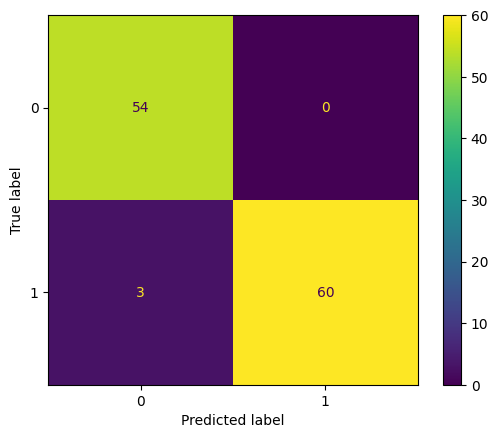

In [46]:
cm = confusion_matrix(y_test_resampled, rf_pred)
print(cm)

#classification report
cr = classification_report(y_test_resampled, rf_pred)
print(cr)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show